# Business Question 1 : Seasonal price trend

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [2]:
calendar_df = pd.read_csv('./seattle/calendar.csv')
print(calendar_df.shape)
calendar_df.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
# Convert price to numeric
calendar_df['price'] = pd.to_numeric(calendar_df['price'].str.replace('[\$,]', '', regex=True))

# Remove all rows where price is null
calendar_df.dropna(axis=0, subset=['price'], inplace=True)
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0


In [4]:
average_price_by_date = pd.DataFrame(calendar_df.groupby('date')['price'].mean())
average_price_by_date.describe()

,price
count,365.000000
mean,137.901783
std,9.860142
min,117.685413
25%,132.446443
50%,136.731206
75%,146.930502
max,157.480000


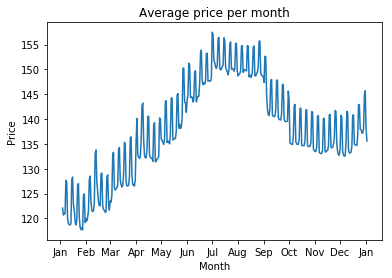

In [5]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plt.plot(pd.to_datetime(average_price_by_date.index), average_price_by_date['price'])
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Average price per month')
plt.savefig('average per month.png')
plt.show()

We can see the above graph fluctuates a lot. This is because prices of listings are usually higher on weekends, and drop down on weekdays.

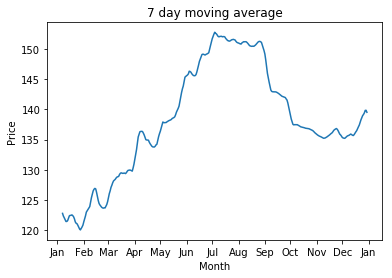

In [6]:
rolling_avg = average_price_by_date.rolling(window=7, center=True).mean()
plt.plot(pd.to_datetime(rolling_avg.index), rolling_avg['price'])
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('7 day moving average')
plt.savefig('moving average per month.png')
plt.show()

We can see average price is highest from July to September, and lowest from January to March.

In [7]:
# create a new column month
calendar_df["month"] = pd.to_numeric(calendar_df['date'].str[5:7])

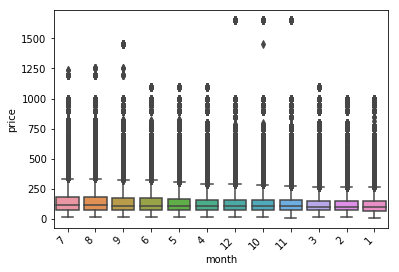

In [15]:
# Let's check the box plot
sort_order = calendar_df.groupby('month')['price'].median().sort_values(ascending=False).index
sns.boxplot(y='price', x='month', data=calendar_df, order=sort_order)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.savefig('monthly boxplot.png', bbox_inches = 'tight')
plt.show()

There are lots of outliers. Still we can see the cheapest and most expensive times are same as discussed above. Prices are lower from January to March, and higher from July to September.

In [9]:
monthly_min = calendar_df.groupby(["month"])["price"].min()
monthly_max = calendar_df.groupby(["month"])["price"].max()
monthly_mean = calendar_df.groupby(["month"])["price"].mean()

Text(0, 0.5, 'Price')

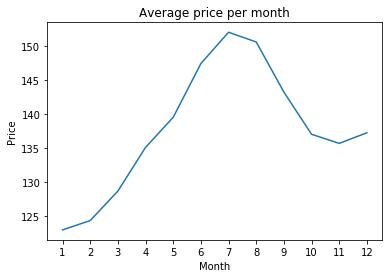

In [10]:
plt.plot(monthly_mean)
plt.title("Average price per month")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.ylabel("Price")

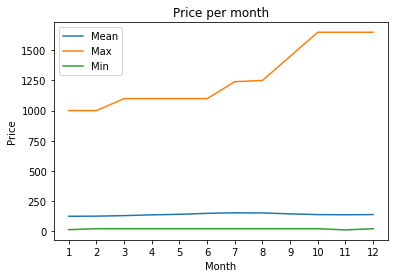

In [11]:
plt.plot(monthly_mean)
plt.plot(monthly_max)
plt.plot(monthly_min)
plt.title("Price per month")
plt.xlabel("Month")
plt.xticks(range(1,13))
plt.ylabel("Price")
plt.legend(('Mean','Max', 'Min'))

In [12]:
idx = calendar_df.groupby(['month'])['price'].transform(max) == calendar_df['price']
calendar_df[idx].sort_values(by='month')

,listing_id,date,available,price,month
1139894,4825073,2017-01-02,t,1000.0,1
1139555,4825073,2016-01-29,t,1000.0,1
1139554,4825073,2016-01-28,t,1000.0,1
1139553,4825073,2016-01-27,t,1000.0,1
1139552,4825073,2016-01-26,t,1000.0,1
1139551,4825073,2016-01-25,t,1000.0,1
1139550,4825073,2016-01-24,t,1000.0,1
1139549,4825073,2016-01-23,t,1000.0,1
1139548,4825073,2016-01-22,t,1000.0,1
1139547,4825073,2016-01-21,t,1000.0,1


In [13]:
calendar_df[idx]['listing_id'].unique()

array([3308979, 2715623, 7733192, 2459519, 4825073], dtype=int64)

In [14]:
calendar_df[calendar_df['listing_id'] == 3308979].groupby(['month']).max()

,listing_id,date,available,price
month,,,,
1,3308979,2017-01-02,t,975.0
2,3308979,2016-02-16,t,975.0
3,3308979,2016-03-31,t,650.0
4,3308979,2016-04-10,t,650.0
6,3308979,2016-06-30,t,975.0
7,3308979,2016-07-31,t,975.0
8,3308979,2016-08-31,t,1250.0
9,3308979,2016-09-30,t,1450.0
10,3308979,2016-10-31,t,1650.0


So we can deduce the following from the above analysis:
- July to September is the most expensive time to visit Seattle. Average prices are the highest during this time.
- Prices are lowest at the start of the year, from January to March.
- Price of listings are higher on weekends than on weekdays.
- The most expensive listing (listing id: 3308979) increases its price more towards the end of the year, as the holiday season approaches.
